<h1><center>Praktikum Pemodelan Statistika Terapan</center></h1>
<h2><center>Dosen Pengampu Ronny Sutsetyoko</center></h2>

<img src="logo pens.png" 
        alt="Picture" 
        width="380" 
        height="380" 
        style="display: block; margin: 0 auto" />

<h3><center>Wahyu Ikbal Maulana</center></h3>

<h3><center>3323600056</center></h3>

<h3><center>D3 SDT B</center></h3>

<h1><center>Politeknik Elektronika Negeri Surabaya</center></h1>
  ‎ 


# Percobaan 1

Studi dari World Values Surveys adalah untuk melihat faktor-faktor yang memengaruhi persepsi masyarakat tentang upaya pemerintah untuk  mengurangi  kemiskinan. Tujuannya  adalah  untuk memprediksi  persepsi  individu  tentang  upaya  pemerintah  untuk mengurangi  kemiskinan  berdasarkan  faktor-faktor  seperti kemiskinan, agama, negara, gelar, jenis kelamin, dan usia. Dalam studi kasus yang diberikan, persepsi individu dapat mengambil tiga nilai berikut - Terlalu Sedikit, Tentang Benar, Terlalu Banyak.

Untuk analisis ini digunakan data dari World Values Surveys  untuk beberapa negara, yaitu Australia, Norwegia, Swedia, dan Amerika Serikat dari paket 'carData' di R.

In [1]:
library(carData)
library(MASS)
data(WVS)
head(WVS)

Warning message:
"package 'carData' was built under R version 4.3.2"


,poverty,religion,degree,country,age,gender
,<ord>,<fct>,<fct>,<fct>,<int>,<fct>
1,Too Little,yes,no,USA,44,male
2,About Right,yes,no,USA,40,female
3,Too Little,yes,no,USA,36,female
4,Too Much,yes,yes,USA,25,female
5,Too Little,yes,yes,USA,39,male
6,About Right,yes,no,USA,80,female


In [3]:
summary(WVS)

        poverty     religion   degree          country          age       
 Too Little :2708   no : 786   no :4238   Australia:1874   Min.   :18.00  
 About Right:1862   yes:4595   yes:1143   Norway   :1127   1st Qu.:31.00  
 Too Much   : 811                         Sweden   :1003   Median :43.00  
                                          USA      :1377   Mean   :45.04  
                                                           3rd Qu.:58.00  
                                                           Max.   :92.00  
    gender    
 female:2725  
 male  :2656  
              
              
              
              

Deskripsi data:
Kemiskinan adalah variabel dependen terdiri dari 3 kategori: too little, 
about right, too much.  Lima variabel independen berikut:


Agama : anggota suatu agama -tidak atau ya


Gelar : mempunyai gelar (tidak atau ya)


Negara : Australia, Norwegia, Swedia atau Amerika Serikat


Usia : usia (tahun)


Jenis Kelamin : laki-laki atau perempuan

Ringkasan Statistik

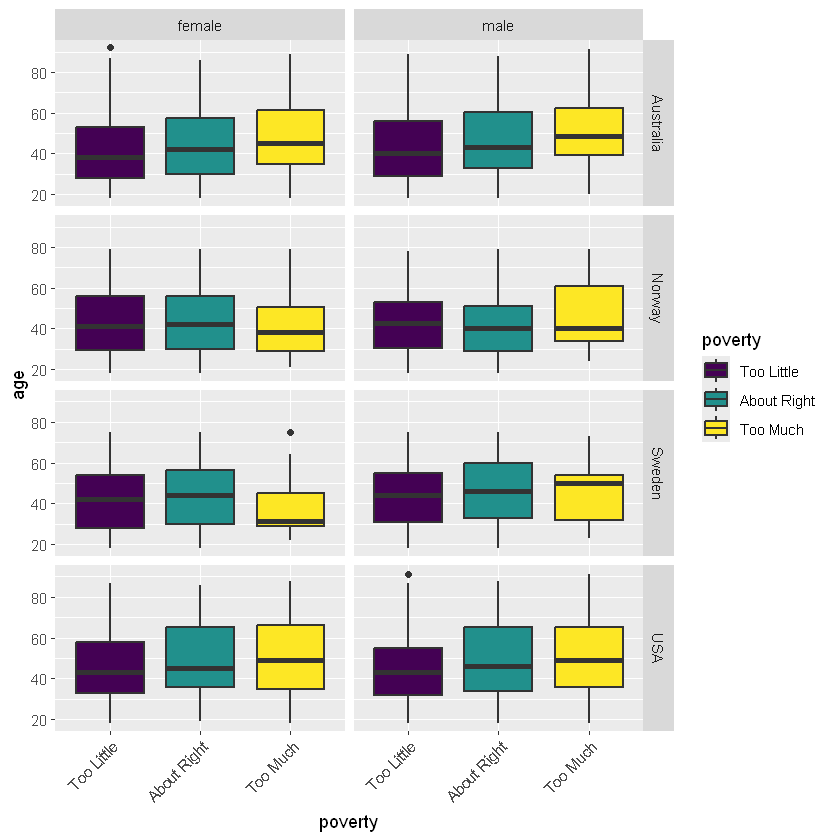

In [6]:
library(ggplot2)
ggplot(WVS, aes(x = poverty, y = age, fill = poverty)) +   geom_boxplot(size = .75) +   facet_grid(country ~ gender, margins = FALSE) +   theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))

Alternatif menganalisis distribusi kemiskinan berdasarkan usia, jenis kelamin, dan negara

In [8]:
model_fit <- polr(poverty~religion+degree+country+age+gender, data = WVS, Hess = TRUE)
summary(model_fit)

Call:
polr(formula = poverty ~ religion + degree + country + age + 
    gender, data = WVS, Hess = TRUE)

Coefficients:
                 Value Std. Error t value
religionyes    0.17973   0.077346   2.324
degreeyes      0.14092   0.066193   2.129
countryNorway -0.32235   0.073766  -4.370
countrySweden -0.60330   0.079494  -7.589
countryUSA     0.61777   0.070665   8.742
age            0.01114   0.001561   7.139
gendermale     0.17637   0.052972   3.329

Intercepts:
                       Value   Std. Error t value
Too Little|About Right  0.7298  0.1041     7.0128
About Right|Too Much    2.5325  0.1103    22.9496

Residual Deviance: 10402.59 
AIC: 10420.59 

Model regresi logistik
Model Regresi Logistik Odds Proporsional menggunakan fungsi polr() dari paket MASS.

In [11]:
summary_table <- coef(summary(model_fit))
pval <- pnorm(abs(summary_table[, "t value"]),lower.tail = FALSE)* 2
summary_table <- cbind(summary_table, "p value" = round(pval,3))
summary_table

,Value,Std. Error,t value,p value
religionyes,0.17973194,0.077346042,2.323738,0.020
degreeyes,0.14091745,0.066193109,2.128884,0.033
countryNorway,-0.32235359,0.073766034,-4.369946,0.000
countrySweden,-0.60329785,0.079493909,-7.589234,0.000
countryUSA,0.61777260,0.070664761,8.742301,0.000
age,0.01114091,0.001560585,7.138933,0.000
gendermale,0.17636863,0.052972253,3.329453,0.001
Too Little|About Right,0.72976353,0.104061643,7.012800,0.000
About Right|Too Much,2.53247870,0.110349780,22.949558,0.000


Karena p-value untuk semua variabel < 0,05, maka secara statistik signifikan pada 95% CI.
Interpretasi Model Peluang Proporsional
Untuk  menginterpretasikan  model  ini,  pertama-tama  kita  perlu memahami cara kerja model peluang proporsional.
Misalkan J adalah jumlah total kategori dari variabel terikat dan M adalah jumlah variabel bebas (Dalam kumpulan data yang diberikan, J=3 dan M = 5).
Rumusan matematis Model Proporsional Odds diberikan di bawah ini: Di sini, j adalah level dari kategori terurut dengan level J dan i berhubungan dengan variabel independen
Dalam kasus kami
j = 1 mengacu pada too little
j = 2 mengacu pada about right
j = 3 mengacu pada too much
i = 1 mengacu pada 'agama'
i = 2 mengacu pada 'gelar'
i = 3 mengacu pada 'negara'
i = 4 mengacu pada 'usia'
i = 5 mengacu pada 'gender'
Menafsirkan model statistik:
Variabel kategoris seperti gender dapat diartikan sebagai: individu laki-laki dibandingkan dengan individu perempuan, dikaitkan dengan kemungkinan yang lebih tinggi untuk memiliki persepsi positif tentang upaya pemerintah untuk mengurangi kemiskinan. Nilai t lebih besar dari 2 dan oleh karena itu signifikan secara statistik pada tingkat 5%.

Variabel kontinyu seperti usia dapat diartikan sbb:
Dengan bertambahnya satu satuan usia log of odds memiliki persepsi positif  tentang  upaya  pemerintah  untuk  mengurangi  kemiskinan meningkat sebesar 0,011.
Intersep:
Secara matematis, intersep “too little | about right” sesuai dengan logit[P(Y ≤ 1)]. Ini dapat diartikan sebagai log of odds percaya bahwa pemerintah  melakukan  'Terlalu  Sedikit'  versus  percaya  bahwa pemerintah melakukan ‘about right' atau ‘too much’.
Demikian  pula,  intersep  ‘about  right |  too  much’ sesuai  dengan logit[P(Y ≤ 2)]. Ini dapat diartikan sebagai log of odds percaya bahwa pemerintah melakukan  too little atau about right versus percaya bahwa pemerintah melakukan too much
Membuat prediksi pada data baru
Katakanlah kita ingin memprediksi probabilitas yang sesuai dengan setiap  persepsi  untuk  seorang  individu  — Test_Person  dengan karakteristik berikut:
Agama : ya
Gelar : tidak
Negara: Norwegia
Umur : 30
jenis kelamin: laki-laki
Komputasi Matematika
Dengan  menggunakan  nilai  intersep  dan  kemiringan  dari  Model Summary, kita dapat memperkirakan probabilitas yang diinginkan dengan cara berikut:
Probabilitas yang sesuai dengan persepsi Terlalu Sedikit akan dihitung sebagai:
logit[P(Y≤1)]=0.7298-[(0.17973*1)+(0.14092*0)+(-0.32235*1)+
(0.01114*30)+(0.17637*1)]
=> logit[P(Y≤1)] =0,36185
=> P(Y ≤1)= exp(0,36185)/(1+exp(0,36185)) = 0,589
Dalam kasus kami, P(Y≤1) = P(Y =1) = 0,589
Demikian pula, probabilitas yang sesuai dengan persepsi Tentang Benar akan dihitung sebagai:
logit[P(Y≤2)]=2.5325-[(0.17973*1)+(0.14092*0)+(-0.32235*1)+ (0.01114*30)+(0.17637*1)]
=> logit[P(Y≤2)] =2.16455
=> P(Y≤2)= exp(2.16455)/(1+exp(2.16455)) = 0.897

Jadi, P(Y = 2) = P(Y 2) — P(Y 1) = 0,897 -0,589
=> P(Y = 2) = 0.308
Probabilitas yang sesuai dengan persepsi too much akan dihitung sebagai:
Jadi, P(Y = 3) = 1- P(Y≤2)
=> P(Y = 3) = 0,103
Dengan menggunakan fungsi prediksi di R

In [12]:
new_data <-
data.frame("religion"="yes","degree"="no","country"="Norway", "age"=30,"gender"="male")
round(predict(model_fit,new_data,type = "p"), 3)

Too Little About Right    Too Much 
      0.589       0.308       0.103